In [ ]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database


100% 777M/778M [00:26<00:00, 33.6MB/s]
100% 778M/778M [00:26<00:00, 31.3MB/s]


In [ ]:
! ls

covid19-radiography-database.zip  kaggle.json  sample_data


In [ ]:
! unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
import pandas as pd
import os


filenames = os.listdir("COVID-19_Radiography_Dataset/COVID/images")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [ ]:
df1.head(5)

filename  category
0  COVID-2822.png         0
1  COVID-2349.png         0
2  COVID-2161.png         0
3  COVID-2271.png         0
4  COVID-2725.png         0

In [ ]:
len(df1)

3616

In [ ]:
categories2=[]
filenames2 = os.listdir("COVID-19_Radiography_Dataset/Lung_Opacity/images") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [ ]:
df2.head(5)

filename  category
0  Lung_Opacity-3158.png         1
1  Lung_Opacity-5728.png         1
2  Lung_Opacity-3657.png         1
3  Lung_Opacity-1064.png         1
4  Lung_Opacity-1603.png         1

In [ ]:
len(df2)

6012

In [ ]:
categories3=[]
filenames3 = os.listdir("COVID-19_Radiography_Dataset/Normal/images") # TB images categorized as 1
for filename in filenames3:
  categories3.append(2)

df3 = pd.DataFrame({
    'filename': filenames3,
    'category': categories3
})

In [ ]:
df3.head(5)

filename  category
0  Normal-6209.png         2
1  Normal-2051.png         2
2  Normal-6824.png         2
3  Normal-5965.png         2
4  Normal-8114.png         2

In [ ]:
len(df3)

10192

In [ ]:
categories4=[]
filenames4 = os.listdir("COVID-19_Radiography_Dataset/Viral Pneumonia/images") # TB images categorized as 1
for filename in filenames4:
  categories4.append(3)

df4 = pd.DataFrame({
    'filename': filenames4,
    'category': categories4
})

In [ ]:
df4.head(5)

filename  category
0   Viral Pneumonia-886.png         3
1  Viral Pneumonia-1028.png         3
2   Viral Pneumonia-242.png         3
3    Viral Pneumonia-53.png         3
4   Viral Pneumonia-936.png         3

In [ ]:
len(df4)

1345

In [ ]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

In [ ]:
df.head(5)

filename  category
0  COVID-2822.png         0
1  COVID-2349.png         0
2  COVID-2161.png         0
3  COVID-2271.png         0
4  COVID-2725.png         0

In [ ]:
len(df)

21165

In [ ]:
df['filename']

0                  COVID-2822.png
1                  COVID-2349.png
2                  COVID-2161.png
3                  COVID-2271.png
4                  COVID-2725.png
                   ...           
21160    Viral Pneumonia-1168.png
21161     Viral Pneumonia-773.png
21162     Viral Pneumonia-159.png
21163     Viral Pneumonia-538.png
21164    Viral Pneumonia-1284.png
Name: filename, Length: 21165, dtype: object

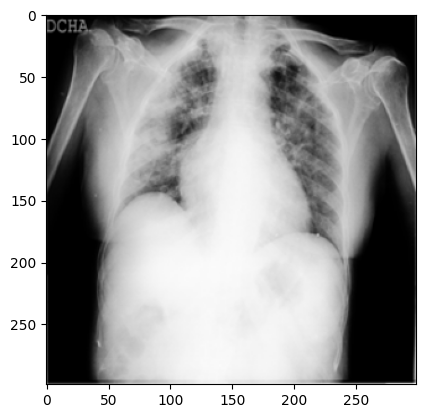

In [ ]:
# <=3615 Covid

# >=3616 but < 9628 = Lung_Opacity

# >=9628 but < 19820 = Normal

# >=19820 Viral Pneumonia
#Showing a sample X ray image


import matplotlib.pyplot as plt
import cv2

# Assuming df['filename'][36] contains the filename of the image
image_path = 'COVID-19_Radiography_Dataset/COVID/images/' + df['filename'][3615]

# Read the image in RGB format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()


In [ ]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((21165,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/COVID/images/'+image_file)
    i+=1

for image_file in df2['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/Lung_Opacity/images/'+image_file)
    i+=1

for image_file in df3['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/Normal/images/'+image_file)
    i+=1

for image_file in df4['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/Viral Pneumonia/images/'+image_file)
    i+=1

In [ ]:
import numpy as np

# Assuming X is your 4D array with shape (4200, 80, 80, 3)
# Check if any row has zero values along the last axis (axis 3)
has_zeros = np.any(X == 0, axis=(1, 2, 3))

# Print the indices of rows with zero values
print("Rows with zero values:", np.where(has_zeros)[0])

# Count the number of rows with zero values
num_rows_with_zeros = np.sum(has_zeros)
print("Number of rows with zero values:", num_rows_with_zeros)

# Check if all rows are filled (no zero values)
all_rows_filled = not np.any(has_zeros)
print("All rows filled:", all_rows_filled)

Rows with zero values: [    0     2     3 ... 21161 21162 21163]
Number of rows with zero values: 15904
All rows filled: False


In [ ]:
X.shape

(21165, 80, 80, 3)

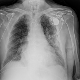

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [ ]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14815, 80, 80, 3)
y_train shape: (14815,)
X_validation shape: (3175, 80, 80, 3)
y_validation shape: (3175,)
X_test shape: (3175, 80, 80, 3)
y_test shape: (3175,)


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


2    1529
1     902
0     542
3     202
Name: category, dtype: int64
Count of 0: 542
Count of 1: 902


In [ ]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


2    1529
1     902
0     543
3     201
Name: category, dtype: int64
Count of 0: 543
Count of 1: 902


In [ ]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


2    7134
1    4208
0    2531
3     942
Name: category, dtype: int64
Count of 0: 2531
Count of 1: 4208


InceptionResNetV2

In [ ]:
# preprocess_input overwrites what it is preprocessing
tf.keras.applications.resnet.preprocess_input(X_train)
tf.keras.applications.resnet.preprocess_input(X_validation)
tf.keras.applications.resnet.preprocess_input(X_test)

array([[[[-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         ...,
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02]],

        [[-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         ...,
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02]],

        [[-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         ...,
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02],
         [-1.00939e+02, -1.13779e+02, -1.20680e+02]],

In [ ]:
# Resize after preprocessing
# ResNet requires at least a 32x32 image (used to require 224x224 but seems to accept 32x32 now)
X_train = tf.image.resize(X_train, [96,96])
X_validation = tf.image.resize(X_validation, [96,96])
X_test = tf.image.resize(X_test, [96,96])



In [ ]:
X_train.shape

TensorShape([14815, 96, 96, 3])

In [ ]:
X_validation.shape

TensorShape([3175, 96, 96, 3])

In [ ]:
X_test.shape

TensorShape([3175, 96, 96, 3])

In [ ]:
# Transfer learn from ResNet50
base_model_1X = keras.applications.InceptionResNetV2(weights="imagenet",
                                         include_top=False,
                                         input_shape=(96,96,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model_1X.output) #Connects the global average pooling layer to the output of the base_model.
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(4, activation="softmax")(dropout)
model_1X = keras.models.Model(inputs=base_model_1X.input, outputs=output)

219055592/219055592 [==============================] - 8s 0us/step


In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model_1X.layers:
  layer.trainable = False

model_1X.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-3),
              metrics=["accuracy"])

history_1X = model_1X.fit(X_train, y_train, batch_size=32,
                    epochs=50, validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/50
463/463 [==============================] - 43s 54ms/step - loss: 27.5793 - accuracy: 0.3717 - val_loss: 7.2634 - val_accuracy: 0.4863
Epoch 2/50
463/463 [==============================] - 20s 43ms/step - loss: 24.8911 - accuracy: 0.3823 - val_loss: 15.3059 - val_accuracy: 0.5140
Epoch 3/50
463/463 [==============================] - 20s 43ms/step - loss: 22.1078 - accuracy: 0.3831 - val_loss: 19.8169 - val_accuracy: 0.4882
Epoch 4/50
463/463 [==============================] - 21s 44ms/step - loss: 20.7658 - accuracy: 0.3874 - val_loss: 19.9131 - val_accuracy: 0.4828
Epoch 5/50
463/463 [==============================] - 21s 45ms/step - loss: 19.9168 - accuracy: 0.3828 - val_loss: 6.7011 - val_accuracy: 0.5254
Epoch 6/50
463/463 [==============================] - 20s 44ms/step - loss: 18.1137 - accuracy: 0.3865 - val_loss: 26.6727 - val_accuracy: 0.2841
Epoch 7/50
463/463 [==============================] - 20s 44ms/step - loss: 18.0500 - accuracy: 0.3851 - val_loss: 18.7956 - v

In [ ]:
# Unfreeze transferred layers and train
%%time
for layer in base_model_1X.layers:
  layer.trainable = True

model_1X.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
              metrics=["accuracy"])
# re-compiling does not change weights

history_1X = model_1X.fit(X_train, y_train, batch_size=32,
                    epochs=100, validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/100
463/463 [==============================] - 215s 186ms/step - loss: 0.5465 - accuracy: 0.7934 - val_loss: 0.4169 - val_accuracy: 0.8671
Epoch 2/100
463/463 [==============================] - 82s 176ms/step - loss: 0.2790 - accuracy: 0.8988 - val_loss: 0.2936 - val_accuracy: 0.8989
Epoch 3/100
463/463 [==============================] - 82s 177ms/step - loss: 0.1531 - accuracy: 0.9469 - val_loss: 0.2876 - val_accuracy: 0.9140
Epoch 4/100
463/463 [==============================] - 82s 177ms/step - loss: 0.0905 - accuracy: 0.9697 - val_loss: 0.2750 - val_accuracy: 0.9102
Epoch 5/100
463/463 [==============================] - 81s 176ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.3837 - val_accuracy: 0.9011
Epoch 6/100
463/463 [==============================] - 81s 175ms/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.2822 - val_accuracy: 0.9197
Epoch 7/100
463/463 [==============================] - 81s 175ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 1.1862 

In [ ]:
keras.utils.plot_model(model_1X, show_shapes=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.517034 to fit



In [ ]:
# Printing validation set accuracy
val_loss, val_accuracy = model_1X.evaluate(X_validation, y_validation)
print(f"Validation Accuracy: {val_accuracy:.4f}")

100/100 [==============================] - 4s 37ms/step - loss: 0.2750 - accuracy: 0.9102
Validation Accuracy: 0.9102


In [ ]:
# Printing test set accuracy
model_1X.evaluate(X_test, y_test)

100/100 [==============================] - 4s 36ms/step - loss: 0.2867 - accuracy: 0.9165


[0.2867336571216583, 0.9165354371070862]

In [ ]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_1X = history_1X.history["accuracy"]
val_accuracy_values_1X = history_1X.history["val_accuracy"]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = model_1X.predict(X_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)

# Display classification report
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'])
print("Classification Report:\n", report)

# Display confusion matrix
cm = confusion_matrix(y_test_np, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate accuracy for each class
class_labels = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']
accuracy_per_class = {}

for i, label in enumerate(class_labels):
    class_index = i
    correct_predictions = np.sum((y_pred_classes == class_index) & (y_test_np == class_index))
    total_samples = np.sum(y_test_np == class_index)
    accuracy = correct_predictions / total_samples
    accuracy_per_class[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.4f}")

# Display overall accuracy
overall_accuracy = accuracy_score(y_test_np, y_pred_classes)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")


100/100 [==============================] - 3s 34ms/step
Classification Report:
                  precision    recall  f1-score   support

          COVID       0.91      0.90      0.91       542
   Lung_Opacity       0.89      0.89      0.89       902
         Normal       0.93      0.94      0.93      1529
Viral_Pneumonia       0.99      0.90      0.94       202

       accuracy                           0.92      3175
      macro avg       0.93      0.91      0.92      3175
   weighted avg       0.92      0.92      0.92      3175

Confusion Matrix:
 [[ 489   25   28    0]
 [  24  802   76    0]
 [  14   75 1438    2]
 [   9    0   12  181]]
Accuracy for COVID: 0.9022
Accuracy for Lung_Opacity: 0.8891
Accuracy for Normal: 0.9405
Accuracy for Viral_Pneumonia: 0.8960

Overall Accuracy: 0.9165


100/100 [==============================] - 3s 34ms/step


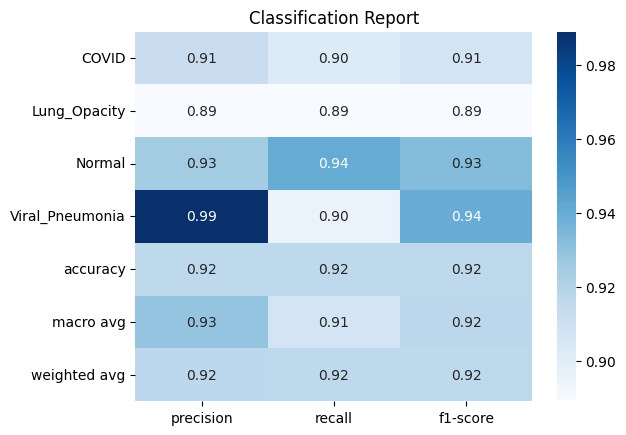

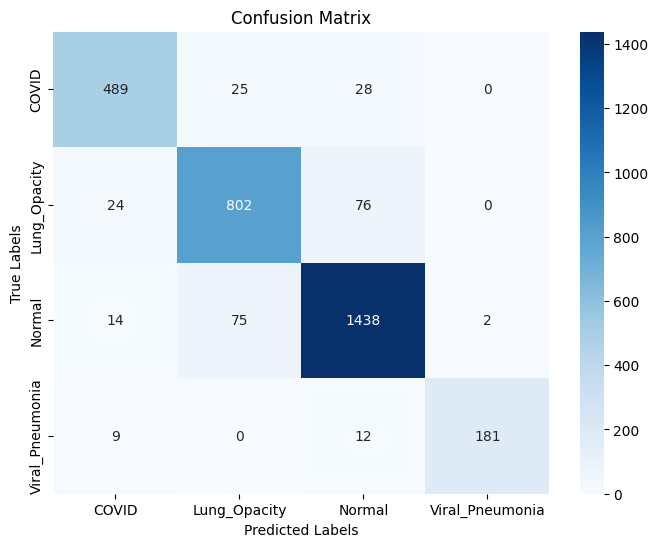

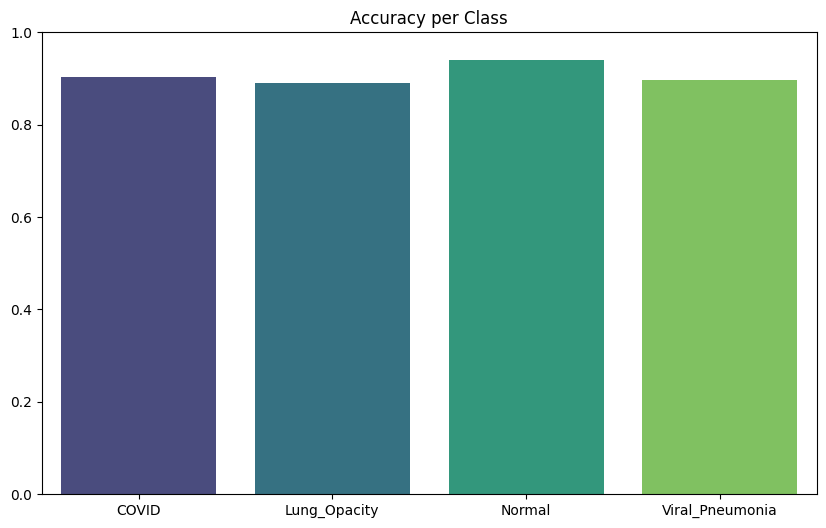


Overall Accuracy: 0.9165


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model_1X.predict(X_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)

# Display classification report with a heatmap
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'], output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.show()

# Display confusion matrix with a heatmap
cm = confusion_matrix(y_test_np, y_pred_classes, labels=[0, 1, 2, 3])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'], yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_per_class.keys()), y=list(accuracy_per_class.values()), palette="viridis")
plt.title("Accuracy per Class")
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy as a percentage
plt.show()

# Display overall accuracy
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")
